# BY PRAVEEN K S 
[My linkedin profile kspraveen20](https://in.linkedin.com/in/kspraveen20)
[My Github profile 0xlightning](https://github.com/0xlightning/)
* R2 Square value are 1 means the prediction is very accurate.
* Which Tells that This is Good Prediction.

Thanks for using my model.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df =  pd.read_excel('Flight_Price_dataset_2.xlsx')
df

,Unnamed: 0,Airline,Class,Aeroplane,Date,Departure_Time,Arrival_Time,Source,Destination,Stops,Duration,Price
0,0,Go First,Ecomony Class,G8-334,"Sun, 23 Jan 2022",08:00:00,10:10:00,New Delhi,Mumbai,Non Stop,2h 10m,5954
1,1,Go First,Ecomony Class,G8-354,"Sun, 23 Jan 2022",22:30:00,00:40\n+ 1 day,New Delhi,Mumbai,Non Stop,2h 10m,5954
2,2,Go First,Ecomony Class,G8-2501,"Sun, 23 Jan 2022",02:00:00,04:15:00,New Delhi,Mumbai,Non Stop,2h 15m,5954
3,3,Go First,Ecomony Class,G8-392,"Sun, 23 Jan 2022",12:45:00,15:00:00,New Delhi,Mumbai,Non Stop,2h 15m,5954
4,4,Go First,Ecomony Class,G8-336,"Sun, 23 Jan 2022",14:20:00,16:35:00,New Delhi,Mumbai,Non Stop,2h 15m,5954
...,...,...,...,...,...,...,...,...,...,...,...,...
2950,2950,Vistara Premium Economy,Premium Ecomony,UK-706/652,"Fri, 4 Feb 2022",13:40:00,21:35:00,New Delhi,Mumbai,1 Stop,7h 55m,7850
2951,2951,Vistara Premium Economy,Premium Ecomony,UK-683/656,"Fri, 4 Feb 2022",13:40:00,15:15\n+ 1 day,New Delhi,Mumbai,1 Stop,25h 35m,7882
2952,2952,Vistara Premium Economy,Premium Ecomony,UK-673/622,"Fri, 4 Feb 2022",13:20:00,18:20:00,New Delhi,Mumbai,1 Stop,5h 00m,9908
2953,2953,Vistara Premium Economy,Premium Ecomony,UK-847/842,"Fri, 4 Feb 2022",11:10:00,14:45\n+ 1 day,New Delhi,Mumbai,1 Stop,27h 35m,19539


In [4]:
df.isnull().sum()

Unnamed: 0        0
Airline           0
Class             0
Aeroplane         0
Date              0
Departure_Time    0
Arrival_Time      0
Source            0
Destination       0
Stops             0
Duration          0
Price             0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2955 entries, 0 to 2954
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      2955 non-null   int64 
 1   Airline         2955 non-null   object
 2   Class           2955 non-null   object
 3   Aeroplane       2955 non-null   object
 4   Date            2955 non-null   object
 5   Departure_Time  2955 non-null   object
 6   Arrival_Time    2955 non-null   object
 7   Source          2955 non-null   object
 8   Destination     2955 non-null   object
 9   Stops           2955 non-null   object
 10  Duration        2955 non-null   object
 11  Price           2955 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 277.2+ KB


In [6]:
df.Stops.unique()

array(['Non Stop', '1 Stop', '2 Stop(s)'], dtype=object)

In [7]:
def str_to_int(val):
    if val=='Non Stop':
        val=0
    elif val=='1 Stop':
        val=1
    else:
        val=2
    return val

In [8]:
df['Stops'] = df['Stops'].apply(str_to_int)
df['Stops']

0       0
1       0
2       0
3       0
4       0
       ..
2950    1
2951    1
2952    1
2953    1
2954    1
Name: Stops, Length: 2955, dtype: int64

In [9]:
def convert_to_minutes(time_str):
    # Split the string into hours and minutes
    parts = time_str.split()
    hours = 0
    minutes = 0

    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))

    # Calculate the total duration in minutes
    total_minutes = hours * 60 + minutes
    return total_minutes

In [10]:
df['Duration'] = df['Duration'].apply(convert_to_minutes)
df['Duration']

0        130
1        130
2        135
3        135
4        135
        ... 
2950     475
2951    1535
2952     300
2953    1655
2954     720
Name: Duration, Length: 2955, dtype: int64

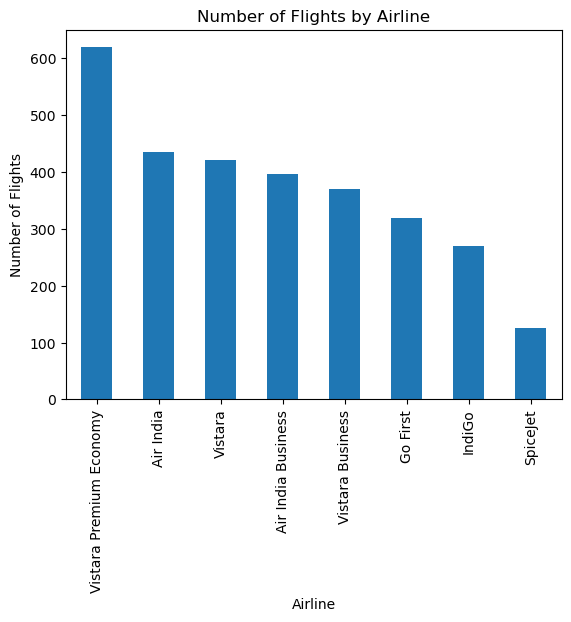

In [11]:
airline_counts = df['Airline'].value_counts()
airline_counts.plot(kind='bar')
plt.title('Number of Flights by Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=90) 
plt.show()

In [12]:
df.describe()

,Unnamed: 0,Stops,Duration,Price
count,2955.000000,2955.000000,2955.000000,2955.000000
mean,1477.000000,0.721151,606.162437,15751.639932
std,853.179348,0.493090,491.993765,13383.511890
min,0.000000,0.000000,120.000000,2410.000000
25%,738.500000,0.000000,140.000000,5955.000000
50%,1477.000000,1.000000,420.000000,9840.000000
75%,2215.500000,1.000000,945.000000,22152.000000
max,2954.000000,2.000000,1805.000000,64712.000000


In [13]:
str_df = df[['Airline', 'Class']]
str_df

,Airline,Class
0,Go First,Ecomony Class
1,Go First,Ecomony Class
2,Go First,Ecomony Class
3,Go First,Ecomony Class
4,Go First,Ecomony Class
...,...,...
2950,Vistara Premium Economy,Premium Ecomony
2951,Vistara Premium Economy,Premium Ecomony
2952,Vistara Premium Economy,Premium Ecomony
2953,Vistara Premium Economy,Premium Ecomony


In [14]:
dummy = pd.get_dummies(str_df, columns=str_df.columns)
dummy

,Airline_Air India,Airline_Air India Business,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Business,Airline_Vistara Premium Economy,Class_Business Class,Class_Ecomony Class,Class_Premium Ecomony
0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
2950,0,0,0,0,0,0,0,1,0,0,1
2951,0,0,0,0,0,0,0,1,0,0,1
2952,0,0,0,0,0,0,0,1,0,0,1
2953,0,0,0,0,0,0,0,1,0,0,1


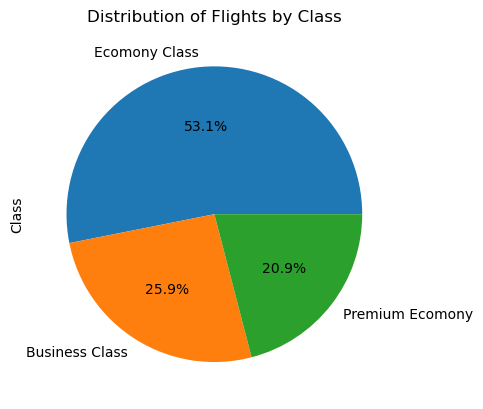

In [15]:
class_counts = df['Class'].value_counts()
class_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Flights by Class')
plt.show()

In [16]:
# num_df = df[['Stops', 'Duration', 'Price']]
num_df = df[['Stops', 'Price']]
num_df

,Stops,Price
0,0,5954
1,0,5954
2,0,5954
3,0,5954
4,0,5954
...,...,...
2950,1,7850
2951,1,7882
2952,1,9908
2953,1,19539


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_num_sc = pd.DataFrame(sc.fit_transform(num_df), columns= num_df.columns)
df_num_sc.head(3)

,Stops,Price
0,-1.462761,-0.732192
1,-1.462761,-0.732192
2,-1.462761,-0.732192


In [18]:
df1 = pd.concat([df_num_sc, dummy], axis=1)
df1

,Stops,Price,Airline_Air India,Airline_Air India Business,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Business,Airline_Vistara Premium Economy,Class_Business Class,Class_Ecomony Class,Class_Premium Ecomony
0,-1.462761,-0.732192,0,0,1,0,0,0,0,0,0,1,0
1,-1.462761,-0.732192,0,0,1,0,0,0,0,0,0,1,0
2,-1.462761,-0.732192,0,0,1,0,0,0,0,0,0,1,0
3,-1.462761,-0.732192,0,0,1,0,0,0,0,0,0,1,0
4,-1.462761,-0.732192,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,0.565610,-0.590501,0,0,0,0,0,0,0,1,0,0,1
2951,0.565610,-0.588110,0,0,0,0,0,0,0,1,0,0,1
2952,0.565610,-0.436704,0,0,0,0,0,0,0,1,0,0,1
2953,0.565610,0.283035,0,0,0,0,0,0,0,1,0,0,1


In [19]:
x = df1.drop('Price', axis=1)
x

,Stops,Airline_Air India,Airline_Air India Business,Airline_Go First,Airline_IndiGo,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Business,Airline_Vistara Premium Economy,Class_Business Class,Class_Ecomony Class,Class_Premium Ecomony
0,-1.462761,0,0,1,0,0,0,0,0,0,1,0
1,-1.462761,0,0,1,0,0,0,0,0,0,1,0
2,-1.462761,0,0,1,0,0,0,0,0,0,1,0
3,-1.462761,0,0,1,0,0,0,0,0,0,1,0
4,-1.462761,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2950,0.565610,0,0,0,0,0,0,0,1,0,0,1
2951,0.565610,0,0,0,0,0,0,0,1,0,0,1
2952,0.565610,0,0,0,0,0,0,0,1,0,0,1
2953,0.565610,0,0,0,0,0,0,0,1,0,0,1


In [20]:
y = df.iloc[:,[-1]]
y

,Price
0,5954
1,5954
2,5954
3,5954
4,5954
...,...
2950,7850
2951,7882
2952,9908
2953,19539


In [21]:
import sklearn
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# when i do not set random_state everytime i run code every time dataset is split for target variable 

In [22]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2364, 12), (591, 12), (2364, 1), (591, 1))

In [23]:
x_train.sort_index(ascending=True, inplace=True)
x_test.sort_index(ascending=True, inplace=True)
y_train.sort_index(ascending=True, inplace=True)
y_test.sort_index(ascending=True, inplace=True)

In [24]:
import statsmodels.api as sm

In [25]:
MLR_model1 = sm.OLS(y_train,x_train).fit()
MLR_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     2244.
Date:                Sat, 14 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:44:09   Log-Likelihood:                -23066.
No. Observations:                2364   AIC:                         4.615e+04
Df Residuals:                    2353   BIC:                         4.622e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Stops                            2377.4522     89.746     26.491      0.000    2201.462    2553.442
Airline_Air India               -3.377e+15   5.92e+15     -0.571      0.568    -1.5e+16    8.23e+15
Airline_Air India Business       4.857e+15    8.8e+15      0.552      0.581   -1.24e+16    2.21e+16
Airline_Go First                -3.377e+15   5.92e+15     -0.571      0.568    -1.5e+16    8.23e+15
Airline_IndiGo                  -3.377e+15   5.92e+15     -0.571      0.568    -1.5e+16    8.23e+15
Airline_SpiceJet                -3.377e+15   5.92e+15     -0.571      0.568    -1.5e+16    8.23e+15
Airline_Vistara                 -3.377e+15   5.92e+15     -0.571      0.568    -1.5e+16    8.23e+15
Airline_Vistara Business         4.857e+15    8.8e+15      0.552      0.581   -1.24e+16    2.21e+16
Airline_Vistara Premium Economy  7.153e+11   1.19e+12      0.599      0.549   -1.63e+12    3.06e+12
Class_Business Class            -4.857e+15    8.8e+15     -0.552      0.581   -2.21e+16    1.24e+16
Class_Ecomony Class              3.377e+15   5.92e+15      0.571      0.568   -8.23e+15     1.5e+16
Class_Premium Ecomony           -7.153e+11   1.19e+12     -0.599      0.549   -3.06e+12    1.63e+12
==============================================================================
Omnibus:                      261.636   Durbin-Watson:                   0.365
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1749.720
Skew:                           0.284   Prob(JB):                         0.00
Kurtosis:                       7.176   Cond. No.                     1.39e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.22e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
y_test_pred = MLR_model1.predict(x_test)
y_test_pred.count()

591

In [27]:
y_test_pred

7        3179.500000
12       8001.500000
29       2947.500000
30       5075.500000
32       5075.500000
            ...     
2941    12005.261353
2949    12005.261353
2951    12005.261353
2953    12005.261353
2954    12005.261353
Length: 591, dtype: float64

In [28]:
y_test_pred.sort_index(ascending=True, inplace=True)

In [29]:
y_test_pred[7]

3179.5

In [30]:
y_test.Price[7]

5954

In [31]:
y_test.Price[200:210]

911    11100
912    11205
926    12150
929    12150
930    12150
932    12150
937    13767
940     5954
941     5954
942     5954
Name: Price, dtype: int64

In [32]:
y_test_pred[200:210]

911    9897.5
912    9549.5
926    9549.5
929    9549.5
930    9897.5
932    9549.5
937    8071.5
940    3179.5
941    3179.5
942    3179.5
dtype: float64

In [33]:
error = y_test.Price-y_test_pred
error

7       2774.500000
12     -2047.500000
29      3007.500000
30       879.500000
32       879.500000
           ...     
2941   -4641.261353
2949   -4155.261353
2951   -4123.261353
2953    7533.738647
2954    8768.738647
Length: 591, dtype: float64

In [34]:
(y_test.Price-y_test_pred)**2

7       7.697850e+06
12      4.192256e+06
29      9.045056e+06
30      7.735202e+05
32      7.735202e+05
            ...     
2941    2.154131e+07
2949    1.726620e+07
2951    1.700128e+07
2953    5.675722e+07
2954    7.689078e+07
Length: 591, dtype: float64

In [35]:
import numpy as np

In [36]:
np.sum((y_test.Price-y_test_pred)**2)

10040216047.111628

In [37]:
np.sum((y_test.Price-y_test_pred)**2)/len(y_test.Price)

16988521.230307322

In [38]:
from sklearn.metrics import r2_score

In [39]:
r2_score(y_true= y_test.Price, y_pred = y_test_pred)

0.8919063176874678

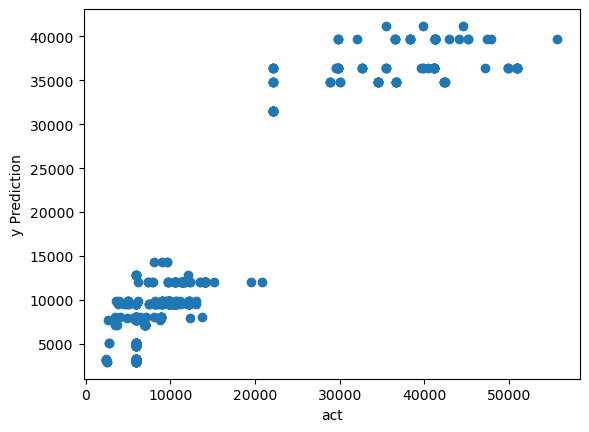

In [40]:
plt.scatter(y_test.Price, y_test_pred)
plt.xlabel('act')
plt.ylabel('y Prediction')
plt.show()

# BY PRAVEEN K S 
[My linkedin profile kspraveen20](https://in.linkedin.com/in/kspraveen20)
[My Github profile 0xlightning](https://github.com/0xlightning/)
* R2 Square value are 1 means the prediction is very accurate.
* Which Tells that This is Good Prediction.

Thanks for using my model.